In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import holoviews as hv
import logomaker as lm
import matplotlib.pyplot as plt

import gpmap.src.plot as plot

from gpmap.src.space import SequenceSpace
from gpmap.src.randwalk import WMWSWalk

In [54]:
data = pd.read_csv('data.full.csv', dtype={'binary': str})
data.head()

,Sequences,RA_1,RA_2,m,var,seq,binary,ypred
0,TATCACAGCGCGTAAAACACAATGGATGGGTCGAA,0.296563,0.312593,0.304578,0.000128,AGCGCGAAAACACAAC,1011101110010111,0.305738
1,TATCACAGCGCGTAAAACACAATGGATGGGTTGAA,0.317296,0.371002,0.344149,0.001442,AGCGCGAAAACACAAT,1011101110010110,0.348186
2,TATCACAGCGCGTAAAACACATTGGATGGGTCGAA,0.280970,0.270548,0.275759,0.000054,AGCGCGAAAACACATC,1011101110010101,0.276947
3,TATCACAGCGCGTAAAACACATTGGATGGGTTGAA,0.319805,0.397730,0.358768,0.003036,AGCGCGAAAACACATT,1011101110010100,0.331854
4,TATCACAGCGCGTAAAACACTATGGATGGGTCGAA,0.506120,0.559888,0.533004,0.001445,AGCGCGAAAACACTAC,1011101110010011,0.537882


In [55]:
space = SequenceSpace(X=data['seq'].values, y=data['ypred'].values)
rw = WMWSWalk(space)

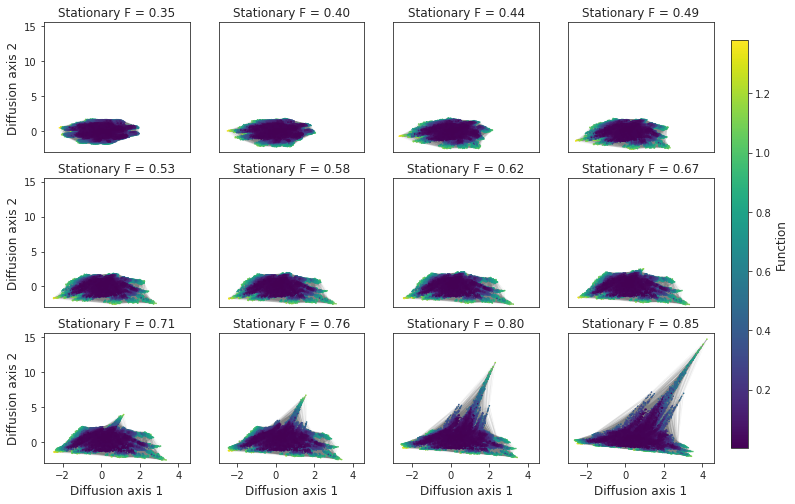

In [11]:
plot.figure_Ns_grid(rw, fmax=0.85, ascending=True)

In [56]:
rw.calc_visualization(mean_function=0.8)
ndf, edf = rw.nodes_df, space.get_edges_df()

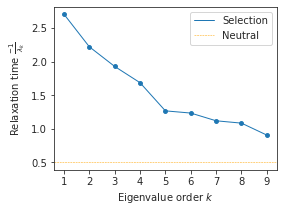

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(4, 3))

plot.plot_relaxation_times(rw.decay_rates_df, axes, neutral_time=0.5)

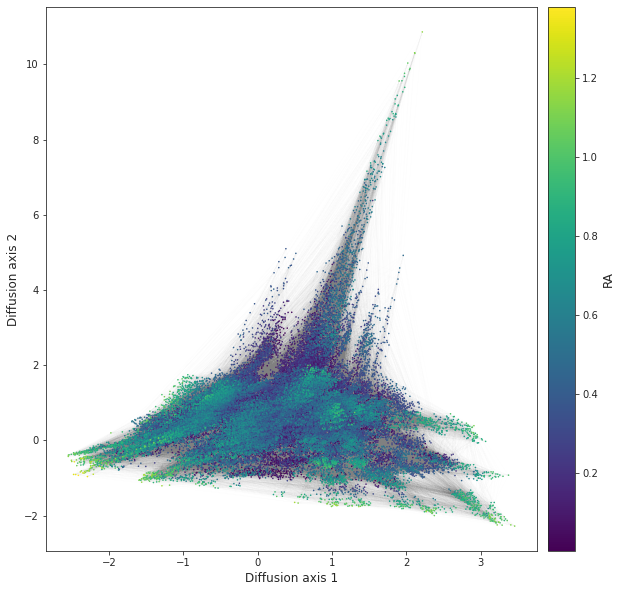

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10))
plot.plot_visualization(axes, ndf, edges_df=edf, ascending=True, nodes_cmap_label='RA', edges_alpha=0.01)

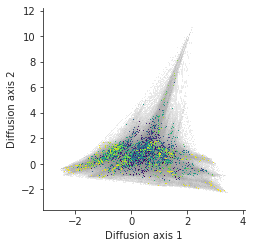

In [23]:
hv.render(plot.plot_holoview(ndf, edges_df=edf, x='1', y='2'))

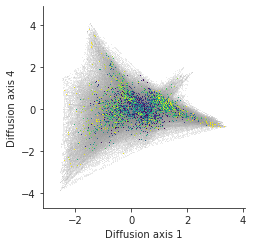

In [40]:
hv.render(plot.plot_holoview(ndf, edges_df=edf, x='1', y='4'))

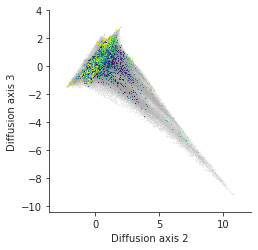

In [25]:
hv.render(plot.plot_holoview(ndf, edges_df=edf, x='2', y='3'))

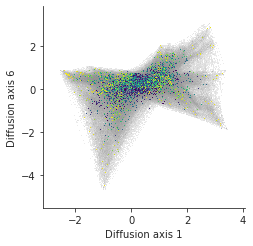

In [45]:
hv.render(plot.plot_holoview(ndf, edges_df=edf, x='1', y='6'))

In [26]:
import logomaker as lm

In [59]:
seqs = [ndf.index[(ndf['1'] < -1.5) & (ndf['4'] > 2)].values,
        ndf.index[(ndf['1'] < -1.5) & (ndf['4'] < -2)].values,
        ndf.index[(ndf['1'] > 2.5) & (ndf['6'] > 1)].values,
        ndf.index[(ndf['1'] > 2.5) & (ndf['6'] < 0.5) & (ndf['6'] > -0.5)].values,
        ndf.index[(ndf['1'] > 2.5) & (ndf['6'] <- 1)].values,
        ndf.index[ndf['2'] > 6].values]

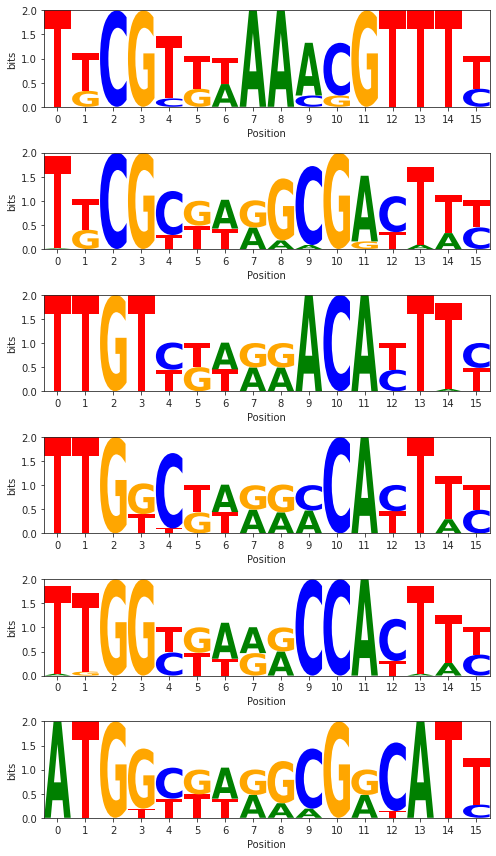

In [86]:
fig, subplots = plot.init_fig(len(seqs), 1, colsize=7, rowsize=2)

for gts, axes in zip(seqs, subplots):
    matrix = lm.alignment_to_matrix(gts, to_type='information', pseudocount=0)
    logo = lm.Logo(matrix, ax=axes)
    axes.set(xticks=np.arange(0, matrix.shape[0]), ylabel='bits', xlabel='Position')
    
fig.tight_layout()